In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Projects Overview
Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung

## Attribute Information:
***The Data From : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data***
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Dividing features into Numerical and Categorical 

In [4]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


Fitur Kategoris : anemia, diabetes, tekanan darah_tinggi, merokok, seks, DEATH_EVENT
Fitur Numerik : usia kreatinin_fosfokinase ejeksi_fraksi trombosit serum_kreatinin serum_waktu natrium
Di sini, fitur kategorikal didefinisikan jika atribut memiliki kurang dari 6 elemen unik selain itu adalah fitur numerik.
Pendekatan tipikal untuk pembagian fitur ini juga dapat didasarkan pada tipe data elemen dari atribut masing-masing.

In [5]:
df['age'] = df['age'].astype(int)
df['platelets'] = df['platelets'].astype(int)
df1 = df.copy(deep = True)
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000,1.4,140,1,1,280,0


# Distribution Checking

### Categorical

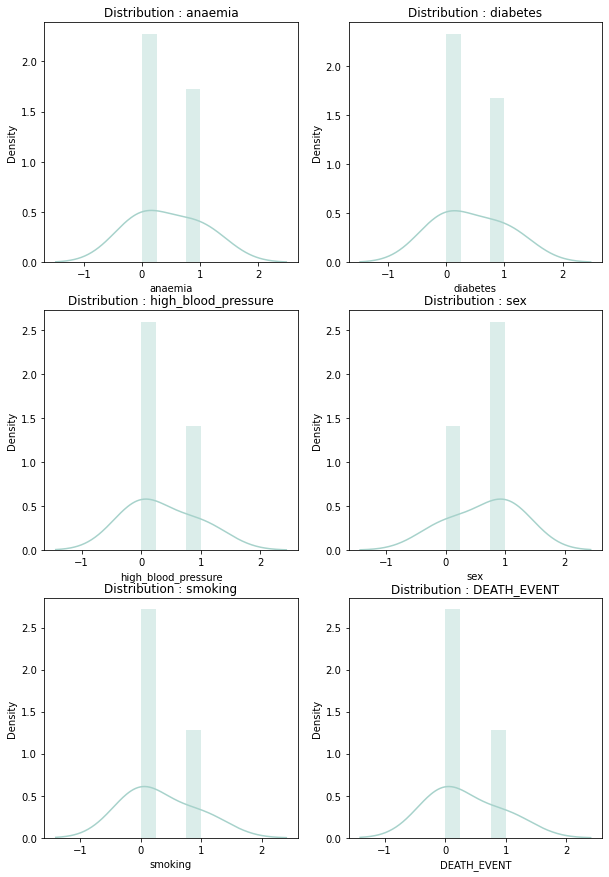

In [6]:
colors = ['#A7D2CB', '#FFC090']
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features)):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

### Numerical

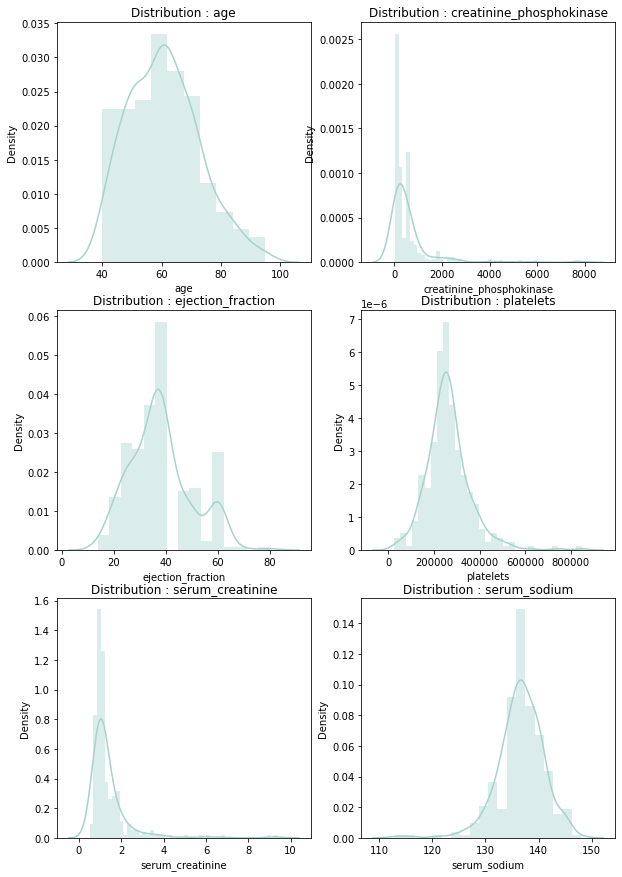

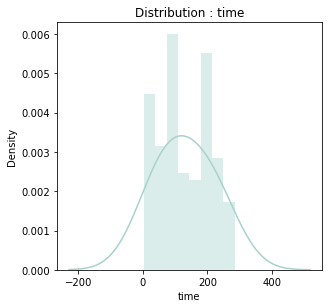

In [7]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(numerical_features) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

memiliki distribusi data yang miring benar atau positif.
- Trombosit dan Serum_Sodium hampir terdistribusi normal.
- Distribusi data waktu mirip dengan grafik Analisis Deret Waktu biasa dengan ketidakteraturan yang ada di dalamnya.

## Target Variable Visualization (DEATH_EVENT)

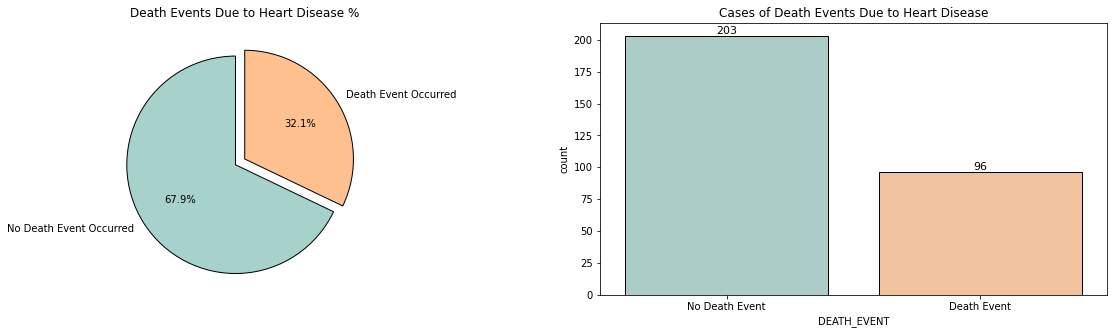

In [8]:
l = list(df1['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Death Event Occurred','Death Event Occurred'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events Due to Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot('DEATH_EVENT',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
plt.title('Cases of Death Events Due to Heart Disease');
plt.show()

- Kumpulan data tidak seimbang dengan titik data yang sangat rendah (299)!
- Rasio 2: 1 untuk kasus Tanpa Peristiwa Kematian : Kasus Peristiwa Kematian!
- Oleh karena itu, prediksi akan menjadi bias terhadap kasus No Death Event.
- Visualisasi juga akan menampilkan bias ini, sehingga menyulitkan untuk mendapatkan insight.

## Categorical Features vs Target Variable (DEATH_EVENT) 

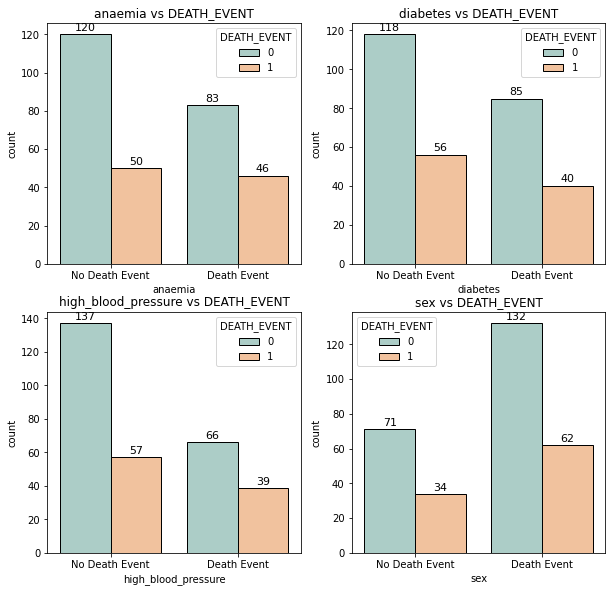

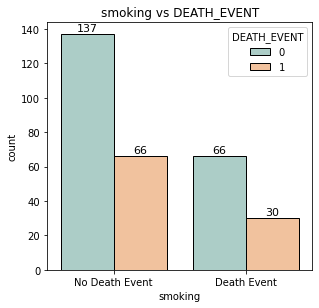

In [9]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(categorical_features) - 2):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(['No Death Event','Death Event'])
    title = categorical_features[i] + ' vs DEATH_EVENT'
    plt.title(title);
    
plt.figure(figsize = (4.75,4.55))
ax = sns.countplot(categorical_features[-2],data = df1,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
title = categorical_features[-2] + ' vs DEATH_EVENT'
plt.title(title);

- Semua grafik di sekitar memiliki pola yang sama.
- Menurut grafik, pasien dengan kasus negatif anemia, diabetes, tekanan darah_tinggi, dan merokok menyebabkan KEMATIAN_EVENT lebih banyak daripada kasus positif dari kondisi medis ini.
- Ada lebih banyak kasus populasi pria yang menghadapi DEATH_EVENT karena gagal jantung daripada populasi wanita.

### Numerical features vs Numerical features w.r.t Target variable(DEATH_EVENT) 

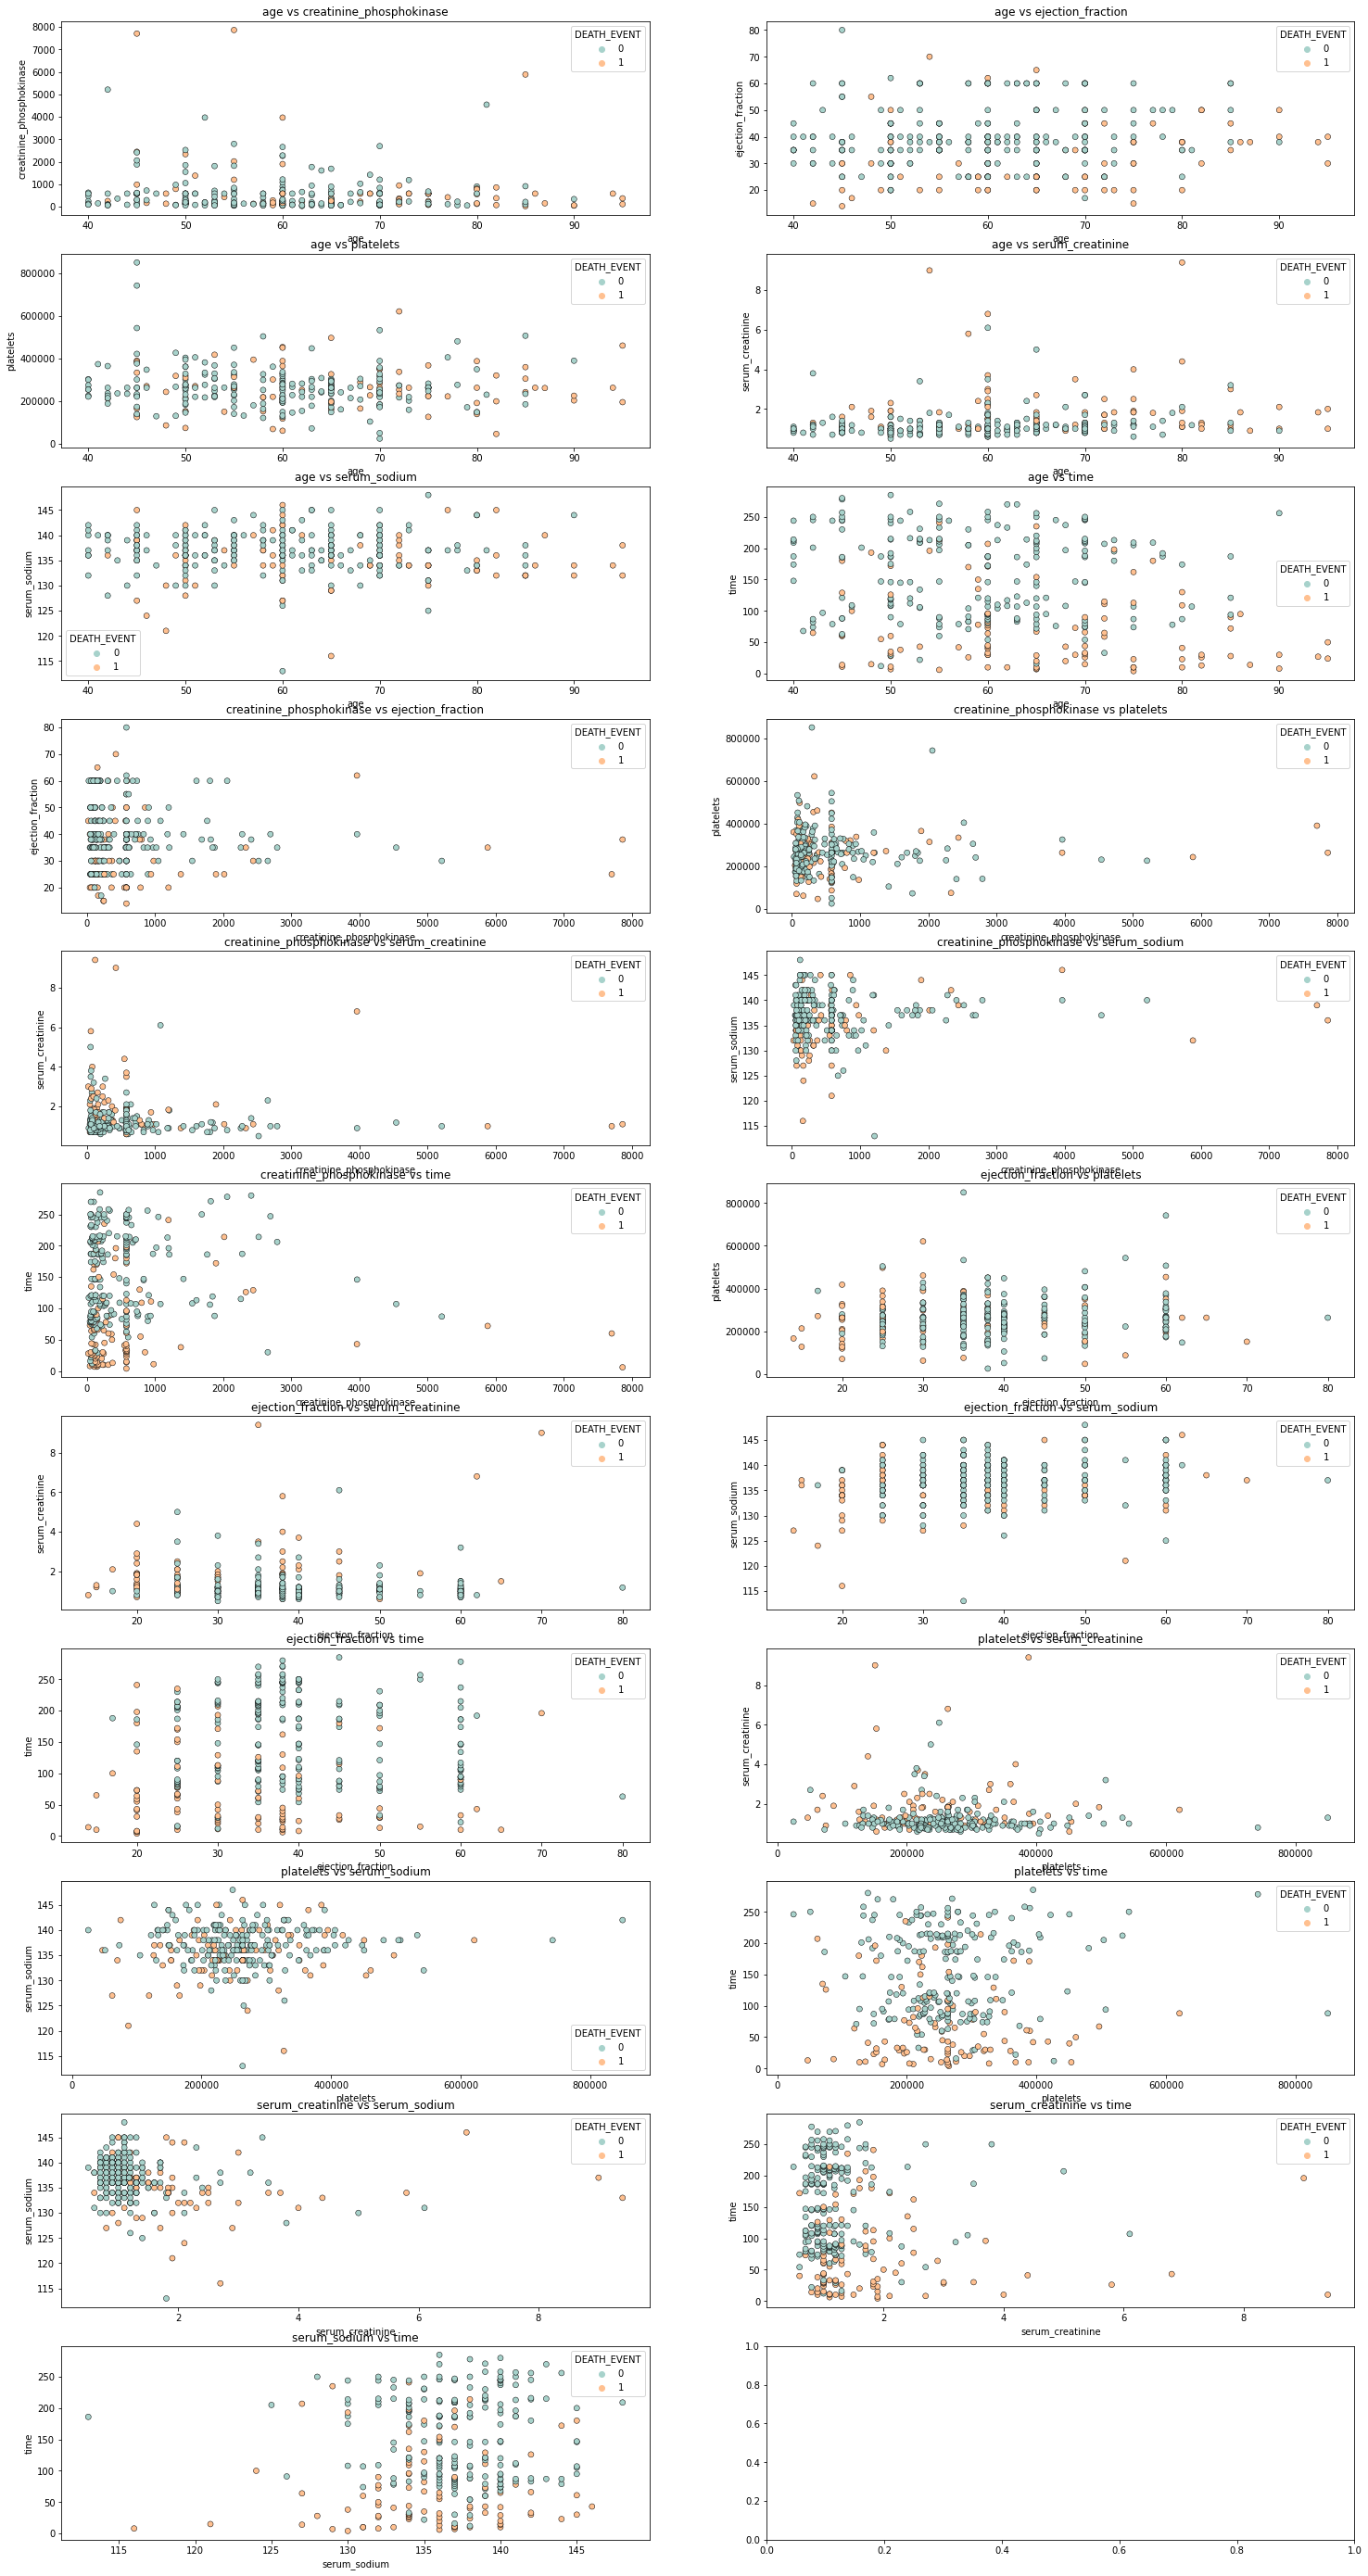

In [10]:
a = 0
fig,ax = plt.subplots(nrows = 11,ncols = 2,figsize = (25,50),squeeze = False)
for i in range(len(numerical_features) - 1):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(11,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df1,hue = 'DEATH_EVENT',palette = colors,edgecolor = 'black');
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- Untuk plot waktu vs usia, puncak DEATH_EVENT dapat ditemukan pada nilai usia 50, 60, 70 dan 80 untuk rentang nilai waktu antara 50 - 100.
- nilai kreatinin_fosfokinase antara 0 - 500 dominan dalam merekam DEATH_EVENT terlepas dari fitur lainnya.
- Demikian pula, nilai ejaction_fraction antara 20 - 40 mencatat jumlah kasus DEATH_EVENT yang tinggi.
- kisaran nilai trombosit antara 2x10^5 - 4x10^5 dan waktu antara 0 - 50 merupakan indikator kuat untuk DEATH_EVENT.
- Indikator lain untuk DEATH_EVENT adalah nilai serum_creatinine dari 0 - 2 dengan nilai waktu dari 0 - 50.
- rentang nilai serum_sodium dari 130 - 140 rekor jumlah kasus tertinggi untuk DEATH_EVENT.

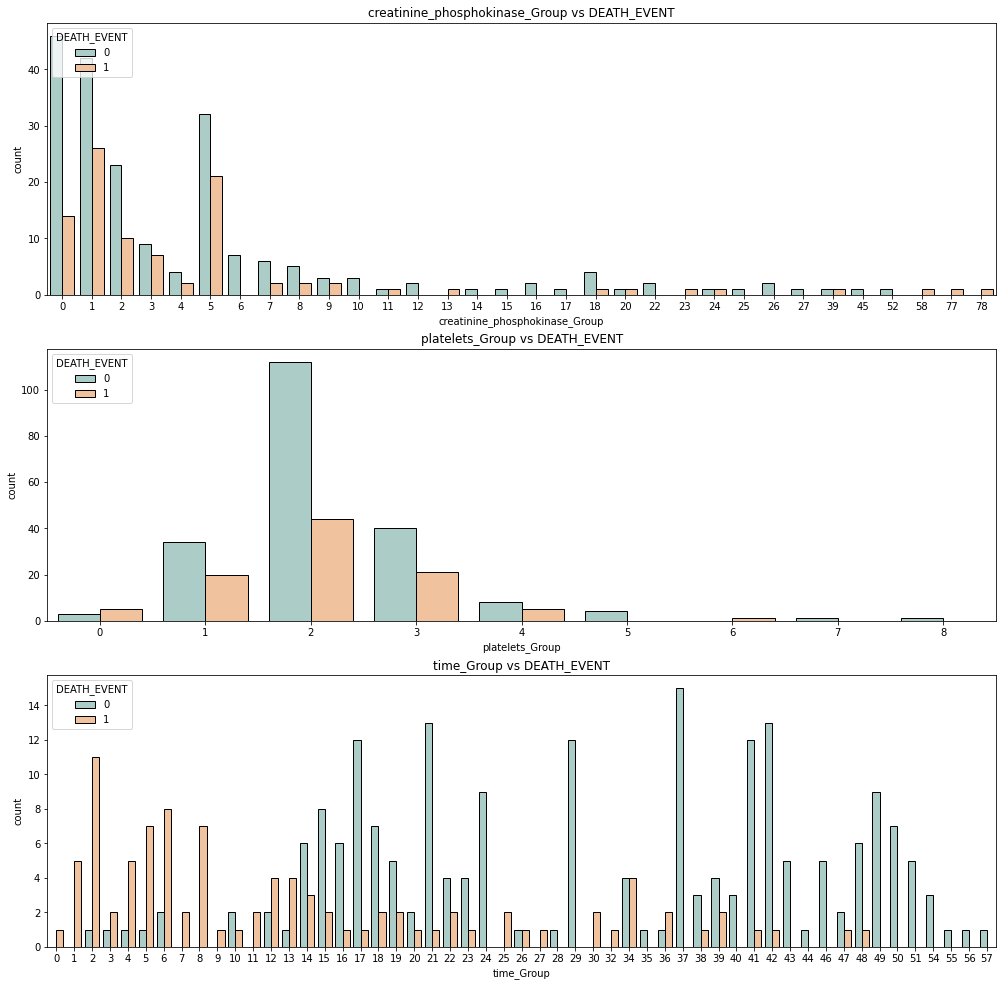

In [11]:
df1['creatinine_phosphokinase_Group'] = [ int(i / 100) for i in df1['creatinine_phosphokinase']]
df1['platelets_Group'] = [ int(i / 10**5) for i in df1['platelets']]
df1['time_Group'] = [ int(i / 5) for i in df1['time']]


fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (17,17))
group_numerical_features = [i + '_Group' for i in ['creatinine_phosphokinase','platelets','time']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(group_numerical_features[i],data = df1,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    title = group_numerical_features[i] + ' vs DEATH_EVENT'
    plt.title(title);

- Kasus DEATH_EVENT tinggi untuk nilai antara 0(0x100) - 500(5x100) untuk kreatinin_fosfokinase.
- nilai trombosit antara 0(0x10^5) - 400.000(4x10^5) rentan terhadap gagal jantung yang mengarah ke DEATH_EVENT.
- Untuk fitur waktu, nilai dari 0(0x5) - 170(34x5) memiliki kemungkinan lebih tinggi untuk menyebabkan DEATH_EVENT.

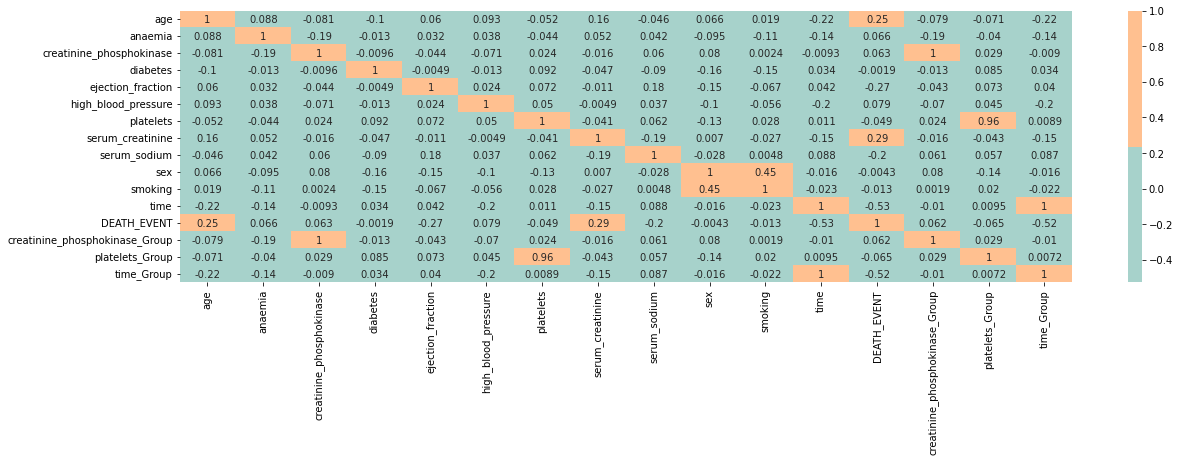

In [12]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

Ini adalah matriks besar dengan terlalu banyak fitur. saya akan memeriksa korelasi hanya sehubungan dengan DEATH_EVENT.

In [13]:
#Check duplicated data
df1.duplicated().sum()

0

In [14]:
#Check missing data
df1.isna().sum()

age                               0
anaemia                           0
creatinine_phosphokinase          0
diabetes                          0
ejection_fraction                 0
high_blood_pressure               0
platelets                         0
serum_creatinine                  0
serum_sodium                      0
sex                               0
smoking                           0
time                              0
DEATH_EVENT                       0
creatinine_phosphokinase_Group    0
platelets_Group                   0
time_Group                        0
dtype: int64

# Modeling
- Logistic Regression
- SVM
- Decission Trees
- Random Forest

## Determine X & Y then Splitting train and test data

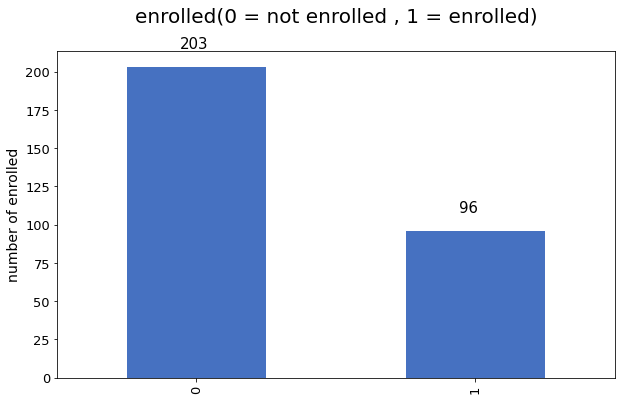

In [34]:
# enrolled distribution
ax = df['DEATH_EVENT'].value_counts().plot(kind='bar', figsize=(10,6), fontsize =13, color='#4671C1')
ax.set_title('enrolled(0 = not enrolled , 1 = enrolled)', size=20, pad=30)
ax.set_ylabel('number of enrolled', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 12, str(round(i.get_height(), 2)), fontsize=15)

darisini proporsi datanya cukup balance namun data yang dimiliki sangatlah sedikit dan kurang bervariasi maka dariitu ada indikasi bahwa model akan overfitt.

In [15]:
X = df1.drop(['DEATH_EVENT'], axis=1)

y = df1['DEATH_EVENT']

In [16]:
# Splitting with 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,y, test_size = 0.2, random_state = 10, stratify=y)

## Feature Scaling

In [17]:
# Preprocessing Standardization (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Train The model
model_lr = LogisticRegression(solver="liblinear", random_state = 42, penalty = 'l1')
%time model_lr.fit(X_train, y_train)
# Predict model DecissionTree and summary statistic
%time lr_test_predict = model_lr.predict(X_test)
cm = confusion_matrix(y_test, lr_test_predict)
print(classification_report(y_test, lr_test_predict))
print(cm)

Wall time: 1e+03 µs
Wall time: 0 ns
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        19

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[41  0]
 [ 0 19]]


## SVM

In [19]:
from sklearn.svm import SVC
# Train The model
model_svc = SVC(kernel="poly", random_state = 42, C=0.1, probability=True)
%time model_svc.fit(X_train, y_train)
# Predict model SVC gaussian and summary statistic
%time svc_test_predict = model_svc.predict(X_test)
cm = confusion_matrix(y_test, svc_test_predict)
print(classification_report(y_test, svc_test_predict))
print(cm)

Wall time: 6 ms
Wall time: 1e+03 µs
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        41
           1       1.00      0.32      0.48        19

    accuracy                           0.78        60
   macro avg       0.88      0.66      0.67        60
weighted avg       0.84      0.78      0.74        60

[[41  0]
 [13  6]]


## Decission Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier
# Train The model
model_dt = DecisionTreeClassifier(criterion ="gini", max_depth = 10, random_state = 42)
%time model_dt.fit(X_train, y_train)
# Predict model DecissionTree and summary statistic
%time dt_test_predict = model_dt.predict(X_test)
cm = confusion_matrix(y_test, dt_test_predict)
print(classification_report(y_test, dt_test_predict))
print(cm)

Wall time: 1 ms
Wall time: 0 ns
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        19

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[41  0]
 [ 0 19]]


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Train The model
model_rf = RandomForestClassifier(criterion ="gini", max_depth = 10, n_estimators = 101, random_state = 42)
%time model_rf.fit(X_train, y_train)
# Predict model RandomForest and summary statistic
%time rf_test_predict = model_rf.predict(X_test)
cm = confusion_matrix(y_test, rf_test_predict)
print(classification_report(y_test, rf_test_predict))
print(cm)


Wall time: 75 ms
Wall time: 6.01 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        19

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[41  0]
 [ 0 19]]


## ROC Curve

In [22]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)

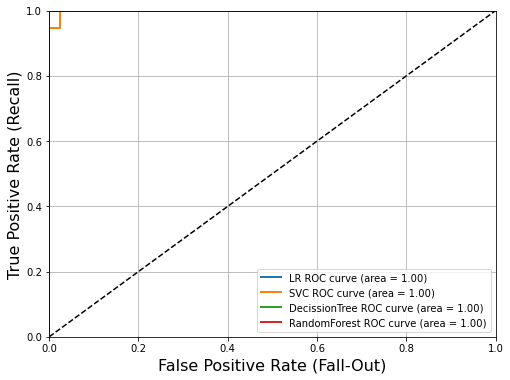

In [23]:
from sklearn.metrics import roc_curve,auc
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                   
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                           
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=["LR",'SVC','DecissionTree', 'RandomForest']
for idx,model in enumerate([model_lr,model_svc,model_dt,model_rf]):
    y_scores=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

## Confusion Matrix

<AxesSubplot:xlabel='Prediksi', ylabel='Aktual'>

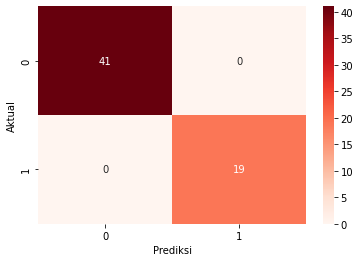

In [24]:
# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))

cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g')

# Model Inference

In [25]:
# Menggabungkan semuanya
y_pred_series = pd.Series(y_test).rename('actual', inplace=True)
hasil_akhir = pd.concat([y_pred_series], axis=1).dropna()
hasil_akhir['predict'] = lr_test_predict
#hasil_akhir.rename(columns={0:'location'}, inplace = True)
hasil_akhir = hasil_akhir[['actual','predict']]

In [26]:
hasil_akhir

,actual,predict
16,1,1
212,0,0
119,1,1
30,1,1
247,0,0
147,0,0
195,1,1
136,0,0
42,1,1
282,0,0
